In [1]:

import math
import numpy as np
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import geocoder

# import requests # library to handle requests
# from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from datetime import datetime

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# import folium # map rendering library

# from bs4 import BeautifulSoup
# import html5lib

import warnings
warnings.simplefilter("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

print('Libraries imported.')

Libraries imported.


In [2]:
# Comment/ Uncomment to perform the analysis for Montreal:
mtl = 1
slab_sales = pd.read_excel(r'C:\Users\15146\Desktop\Forecast\SalesSummary_Mtl.xlsx')

# Comment/ Uncomment to perform the analysis for Ottawa:
# mtl = 0
# slab_sales = pd.read_excel(r'C:\Users\15146\Desktop\Forecast\SalesSummary_Ot.xlsx')

In [3]:
slab_sales.columns = slab_sales.iloc[1]
slab_sales = slab_sales.iloc[2:]
slab_sales.reset_index(drop=True)
slab_sales.head()

1,Item Name,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,NaN
2,Alaska Wave 3cm - Discontinued,0,0,0,0,0,0,0,0,0,0,2,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1980,990,2112,3036,0,0,0,0,0,0,0,0,0,0,NaN
3,Amethyst 3cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1600,0,0,1448,0,0,0,2896,0,1448,NaN
4,Antique Concrete Leathered 3cm / Discontinued,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1125,0,0,0,0,0,0,0,0,NaN
5,Antonio 3cm,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3790,0,0,4042.67,0,0,0,0,0,0,0,0,0,0,0,NaN
6,Aqua White 2cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,892,0.01,0,0,0,0,NaN


In [4]:
slab_sales.shape[1]

74

In [5]:
# qty = slab_sales.iloc[:, 25:49]
# qty.reset_index(drop=True)
# item_name = slab_sales[['Item Name']]
# item_name.reset_index(drop=True)
# slab_sales_qty = slab_sales[['Item Name']].join(slab_sales.iloc[:, 0:25])

# Knowing the structure of the dataframe that repeats the total period three times with different info (slab quantity, sf,...) we are able to determine the index column based on the shape of the dataframe.

last_col = int((slab_sales.shape[1] + 1)/3)
slab_sales_qty = slab_sales.iloc[:,0:last_col]
slab_sales_qty.head()

1,Item Name,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
2,Alaska Wave 3cm - Discontinued,0,0,0,0,0,0,0,0,0,0,2,1,2,3,0,0,0,0,0,0,0,0,0,0
3,Amethyst 3cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,1
4,Antique Concrete Leathered 3cm / Discontinued,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,Antonio 3cm,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0
6,Aqua White 2cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [6]:
# slab_sales_qty['Item Name'].unique()

In [7]:
# Specify the name and thickness of the color you would like to forecast:
color_name = 'Argento'
color_thickness = 3

color = color_name + ' ' + str(color_thickness) + 'cm'

In [8]:
# Uncoment this line if you want to forecast total sales:
# slab_sales_qty_total = slab_sales_qty.iloc[[-1]]

# Uncomment this line if you want to forecast a specific color:
slab_sales_qty_total = slab_sales_qty[slab_sales_qty['Item Name'] == color]

slab_sales_qty_total.head()

1,Item Name,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
11,Argento 3cm,0,0,0,0,0,0,0,0,0,5,0,3,1,2,6,6,2,1,0,0,0,1,0,4


In [9]:
slab_totals = slab_sales_qty_total.transpose()
slab_totals.head()

,11
1,
Item Name,Argento 3cm
2018-09-01 00:00:00,0
2018-10-01 00:00:00,0
2018-11-01 00:00:00,0
2018-12-01 00:00:00,0


In [10]:
slab_totals.columns=slab_totals.iloc[0]
slab_totals = slab_totals.iloc[1:]
slab_totals

Item Name,Argento 3cm
1,
2018-09-01 00:00:00,0
2018-10-01 00:00:00,0
2018-11-01 00:00:00,0
2018-12-01 00:00:00,0
2019-01-01 00:00:00,0
2019-02-01 00:00:00,0
2019-03-01 00:00:00,0
2019-04-01 00:00:00,0
2019-05-01 00:00:00,0


In [11]:
if mtl:
    slab_totals = slab_totals.iloc[8:]
    slab_totals

In [12]:
# slab_totals.columns = ['Date', 'Totals']
# slab_totals.columns
slab_totals.reset_index(inplace=True)
slab_totals.columns = ['Date', 'Totals']
slab_totals['Date'] = pd.to_datetime(slab_totals['Date'])
slab_totals.index = slab_totals['Date']
del slab_totals['Date']
slab_totals

,Totals
Date,
2019-05-01,0
2019-06-01,5
2019-07-01,0
2019-08-01,3
2019-09-01,1
2019-10-01,2
2019-11-01,6
2019-12-01,6
2020-01-01,2


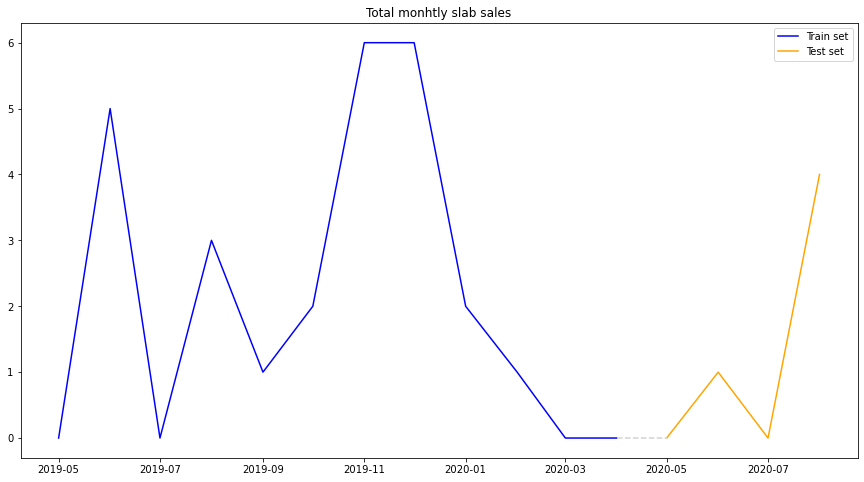

In [13]:
cutoff = math.ceil(slab_totals.shape[0]*0.7)
slab_totals_train = slab_totals[0:cutoff]
slab_totals_test = slab_totals[cutoff:]

plt.figure(figsize=(15,8))
# ax = slab_totals_train.plot(figsize=(15,8), kind='line', y='Totals', color = 'blue', label='Train set')
plt.plot(slab_totals_train, color = 'blue', label='Train set')
# slab_totals_test.plot(ax = ax , figsize=(15,8), kind='line', y='Totals', color = 'orange', label='Test set')
plt.plot(slab_totals_test, color = 'orange', label='Test set')
missing =slab_totals_train.iloc[-1:].append(slab_totals_test.iloc[:1])
plt.plot(missing,color='lightgrey', linestyle = '--')
plt.legend(loc='best')
plt.title('Total monhtly slab sales')
plt.show()

In [14]:
# Adjust sales of April due to COVID effect.
# Using the rolling mean with a window of 6 months, the sale qty for april is estimated.

slab_totals['2020-04'] = list(slab_totals.rolling(6).mean()['2020-04'].iloc[0])[0]
# slab_totals['2020-04']['Totals'] = slab_totals['2020-04']['Totals'].floor()
# list(slab_totals.rolling(6).mean()['2020-04'].iloc[0])[0]

### Apply log transform:

In [15]:
# Choose to apply log transform (1: YES, 0: NO):
apply_log = 0

In [16]:
from scipy.stats import boxcox
# boxcox(slab_totals['Totals'].astype(float))

In [16]:
if apply_log:
    ## Apply log to reduce variance of the series:
    slab_totals_log = np.log(slab_totals.astype(float))
else:
    slab_totals_log = slab_totals.astype(float)


# slab_totals_log = slab_totals
print(slab_totals_log)

## Apply Boxcox transform:
# slab_totals_log = boxcox(slab_totals.astype(float))

Totals
Date              
2019-05-01     0.0
2019-06-01     5.0
2019-07-01     0.0
2019-08-01     3.0
2019-09-01     1.0
2019-10-01     2.0
2019-11-01     6.0
2019-12-01     6.0
2020-01-01     2.0
2020-02-01     1.0
2020-03-01     0.0
2020-04-01     2.5
2020-05-01     0.0
2020-06-01     1.0
2020-07-01     0.0
2020-08-01     4.0


### Preparing train and test sets:

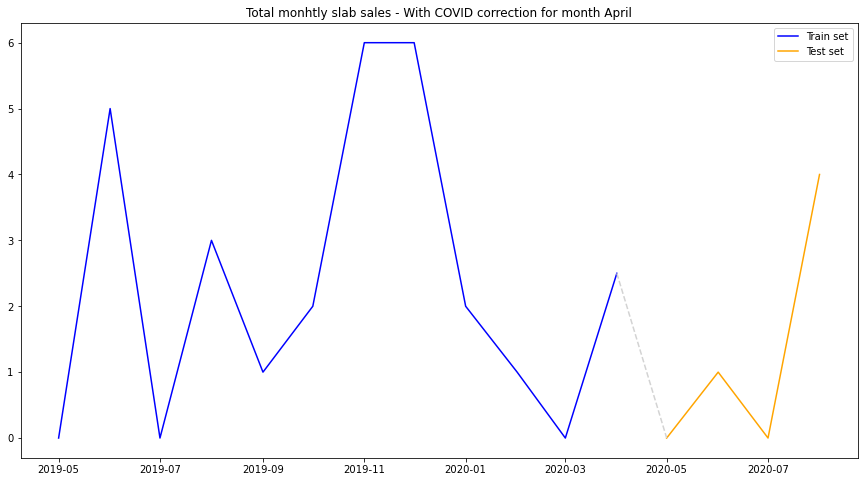

In [17]:
# Preparing the train and test samples:
# 70% of the data will be dedicated to training and the remaining 30% for testing.
cutoff = math.ceil(slab_totals.shape[0]*0.7)
slab_totals_train_log = slab_totals_log[:cutoff]
slab_totals_test_log = slab_totals_log[cutoff:]

# Plotting the figure:
plt.figure(figsize=(15,8))
plt.plot(slab_totals_train_log, color = 'blue', label='Train set')
plt.plot(slab_totals_test_log, color = 'orange', label='Test set')
missing =slab_totals_train_log.iloc[-1:].append(slab_totals_test_log.iloc[:1])

plt.plot(missing,color='lightgrey', linestyle = '--')
plt.legend(loc='best')
plt.title('Total monhtly slab sales - With COVID correction for month April')
plt.show()

## Checking Stationarity:

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

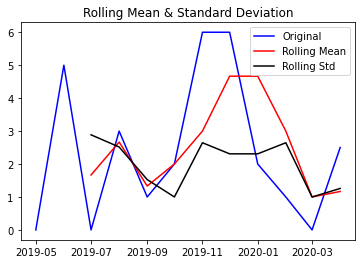

Results of Dickey-Fuller Test:
Test Statistic                -1.847229
p-value                        0.357279
#Lags Used                     3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [19]:
test_stationarity(slab_totals_train_log)

## Differencing:

In [20]:
# Differencing to make the time series stationary

slab_totals_train_log_diff = slab_totals_train_log.diff(1).dropna()
slab_totals_train_log_diff

,Totals
Date,
2019-06-01,5.0
2019-07-01,-5.0
2019-08-01,3.0
2019-09-01,-2.0
2019-10-01,1.0
2019-11-01,4.0
2019-12-01,0.0
2020-01-01,-4.0
2020-02-01,-1.0


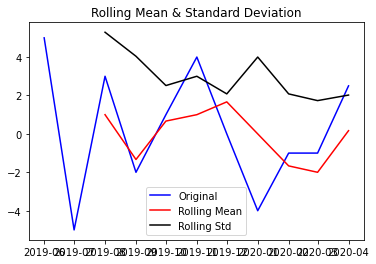

Results of Dickey-Fuller Test:
Test Statistic                 -5.101051
p-value                         0.000014
#Lags Used                      0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [21]:
#Check stationarity to see if differencing had and effect on making the series stationary
test_stationarity(slab_totals_train_log_diff) 
# We see that the time series is stationay with a confidence level of 95%

In [22]:
# Keep differencing or no:
d = 1
if ~d:
    slab_totals_train_log_diff = slab_totals_train_log

In [23]:
# must have 2 complete cycles requires 24 observations.
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(slab_totals)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

## ACF & PACF

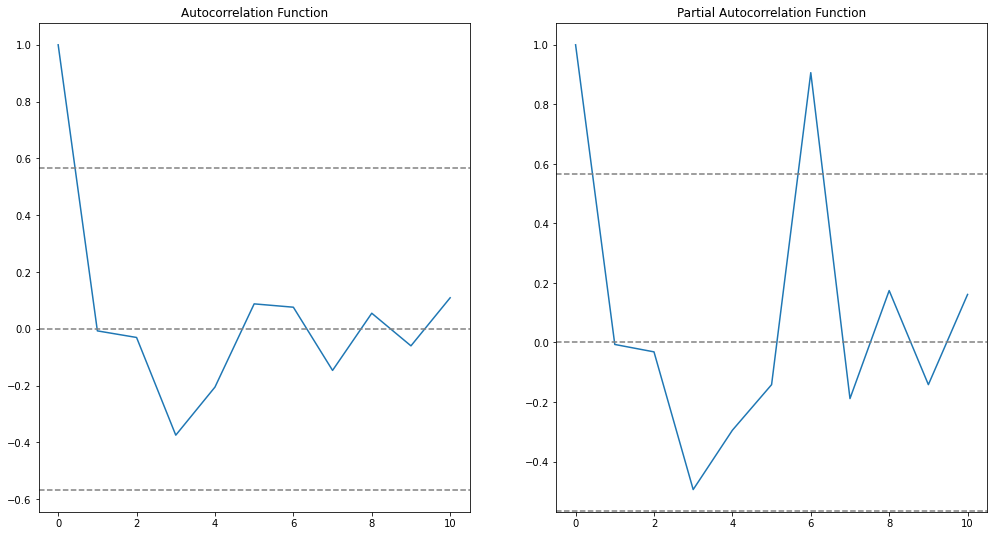

In [24]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(slab_totals_train_log_diff, nlags=10) # nlags is the number of lags to be displayed on the graph
lag_pacf = pacf(slab_totals_train_log_diff, nlags=10, method='ols')

plt.figure(figsize=(17,9))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
# plt.tight_layout()
plt.show()

## ARIMA

### Preparing some metrics

In [25]:
# x% MAPE implies the model is about (100-x)% accurate in predicting the next n observations.
def mape(y_true, y_pred): 
    # y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Preparing libraries

In [26]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [27]:
import warnings
warnings.filterwarnings("ignore")
# Build a dataframe for different combination of p and q and compute the mape(train set, fitted values) as well as the mape(train set, forecast) 
p_q_mape = pd.DataFrame(columns = ['p','q','mape', 'mape_fc', 'AIC'])
for p in np.arange(12):
    for q in np.arange(12):
        try:
            model = SARIMAX(slab_totals_train_log.astype(float), order=(p, d, q), seasonal_order = (0, 0, 0, 12))
            # model = ARIMA(slab_totals_train_log.astype(float), order=(p, 1, q))
            results_ARIMA = model.fit(disp=0)
            mape_train = mape(slab_totals_train_log['Totals'], results_ARIMA.fittedvalues)
            fc_log = results_ARIMA.forecast(len(slab_totals_test_log))
            if apply_log:
                fc = np.exp(fc_log)
            else:
                fc = fc_log
            mape_forecast = mape(slab_totals_test['Totals'], fc)
            AIC = results_ARIMA.aic
            BIC = results_ARIMA.bic
            # print("p(%.4f), q(%.4f):  MAPE %.4f MAPE_FC %.4f"%(p,q, mape, mape_forecast))
        except:
            mape_train = None
            mape_forecast = None
            AIC = None
            BIC = None
            # print("p(%.4f), q(%.4f): "%(p,q) + 'MAPE none MAPE_FC none')
        p_q_mape = p_q_mape.append(pd.DataFrame({'p': p, 'q':q, 'mape': mape_train, 'mape_fc': mape_forecast, 'AIC': AIC, 'BIC': BIC }, index=[0]), ignore_index=True)

In [28]:
# Sort the dataframe by ascending mape and mape_forecast:
p_q_mape[p_q_mape.mape != None]
p_q_mape.sort_values(by='AIC', ascending = True, inplace=True)
# p_q_mape.sort_values(by='mape_fc', ascending = True, inplace=True)
# p_q_mape.sort_values(by='mape', ascending = True, inplace=True)
p_q_mape.head(10)

,p,q,mape,mape_fc,AIC,BIC
0,0,0,None,None,None,None
1,0,1,None,None,None,None
2,0,2,None,None,None,None
3,0,3,None,None,None,None
4,0,4,None,None,None,None
5,0,5,None,None,None,None
6,0,6,None,None,None,None
7,0,7,None,None,None,None
8,0,8,None,None,None,None
9,0,9,None,None,None,None


In [36]:
# Select the values of p and q that render the lowest forecast mape (remeber that forecast mape is the mean absolute error between the test set and the forecast values)
p_mape_fcmin = list(p_q_mape[p_q_mape.mape_fc == p_q_mape.mape_fc.min()]['p'])[0]
q_mape_fcmin = list(p_q_mape[p_q_mape.mape_fc == p_q_mape.mape_fc.min()]['q'])[0]

# Select the values of p and q that render the lowest AIC:
p_aicmin = list(p_q_mape[p_q_mape.AIC == p_q_mape.AIC.min()]['p'])[0]
q_aicmin = list(p_q_mape[p_q_mape.AIC == p_q_mape.AIC.min()]['q'])[0]

In [37]:
print("Values of p & q rendering lowest forecast mape: p(%.4f), q(%.4f)"%(p_mape_fcmin,q_mape_fcmin))

print("Values of p & q rendering lowest forecast aic: p(%.4f), q(%.4f)"%(p_aicmin,q_aicmin))

Values of p & q rendering lowest forecast mape: p(6.0000), q(8.0000)
Values of p & q rendering lowest forecast aic: p(10.0000), q(5.0000)


In [62]:
p_selected = 10
q_selected = 6

### Defining the selected model

In [63]:

# The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q).
# model = SARIMAX(slab_totals_train_log.diff(2).dropna().astype(float), order=(0, 0, 1))


model_selected = SARIMAX(slab_totals_train_log.astype(float), order=(p_selected, d, q_selected), seasonal_order = (0, 0, 0, 12)) # Model with best overall performance

# model_selected = SARIMAX(slab_totals_train_log.astype(float), order=(p_mape_fcmin, 1, q_mape_fcmin), seasonal_order = (0, 0, 0, 12)) # Best mape forecast compared to test set

results_ARIMA = model_selected.fit(disp=0) 
print(results_ARIMA.summary())

SARIMAX Results                                
Dep. Variable:                 Totals   No. Observations:                   12
Model:              SARIMAX(10, 1, 6)   Log Likelihood                  -2.797
Date:                Tue, 08 Sep 2020   AIC                             39.593
Time:                        11:44:48   BIC                             46.357
Sample:                    05-01-2019   HQIC                            35.329
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7559      1.895      0.399      0.690      -2.958       4.470
ar.L2          0.1639      2.316      0.071      0.944      -4.375       4.703
ar.L3         -1.5215      3.152     -0.483      0.629      -7.699       4.656
ar.L

### Analyzing the model:

RMS: 1.3353
RSS: 21.3954


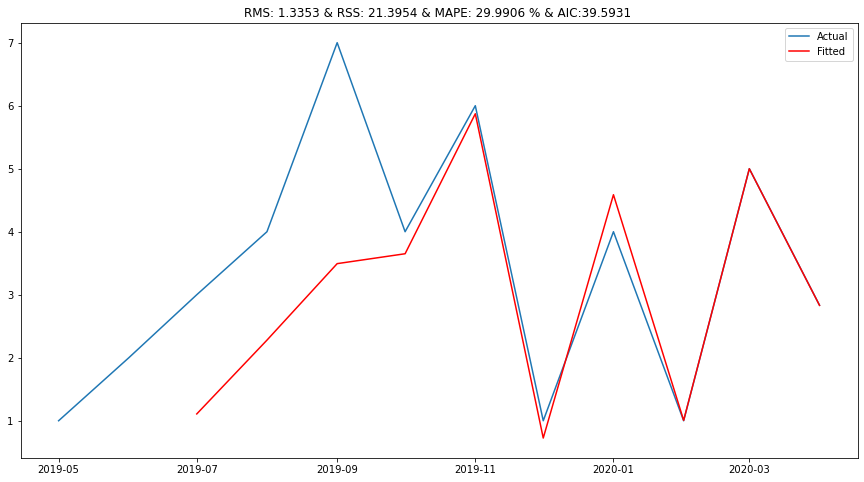

In [64]:
plt.figure(figsize=(15,8)) 
plt.plot(slab_totals_train_log, label='Actual')
plt.plot(results_ARIMA.fittedvalues[2:], color='red',label = 'Fitted')
plt.legend(loc='best')

rss = sum((results_ARIMA.fittedvalues-slab_totals_train_log['Totals'])**2)

rms = sqrt(mean_squared_error(slab_totals_train_log['Totals'],results_ARIMA.fittedvalues))
# rms = 0

mape_train = mape(slab_totals_train_log['Totals'], results_ARIMA.fittedvalues)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %% & AIC:%.4f '%(rms,rss, mape_train, results_ARIMA.aic ) )

print('RMS: %.4f'% rms)
print('RSS: %.4f'% rss)

In [65]:
results_ARIMA.fittedvalues.shape
# slab_totals_train

(12,)

<Figure size 1224x648 with 0 Axes>

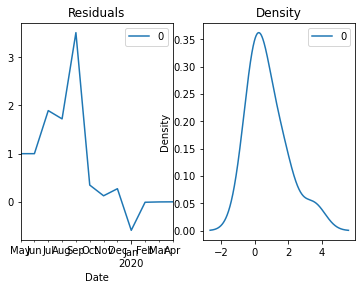

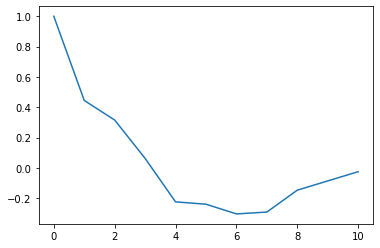

In [66]:
residuals = pd.DataFrame(results_ARIMA.resid)
plt.figure(figsize=(17,9))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

resid_acf = acf(results_ARIMA.resid, nlags=10)
plt.plot(resid_acf)

### Forecasting and comparing to the test set

RSS: 137.7645
RMS: 5.8687
MAPE: 48.8288%


Text(0.5, 1.0, 'RMS: 5.8687 & RSS: 137.7645 & MAPE: 48.8288 %')

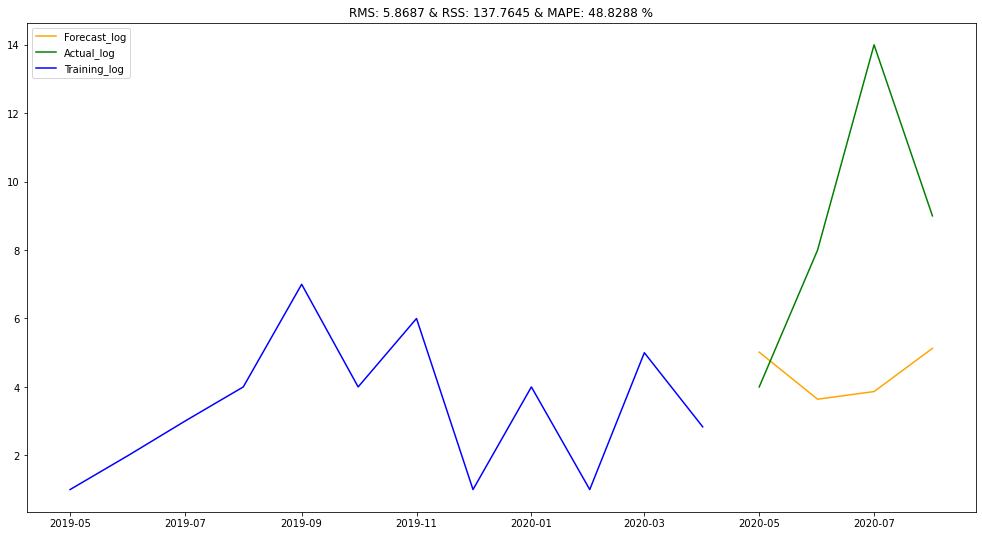

In [67]:
# Computing forecast data based on the length of the test set:
fc_log = results_ARIMA.forecast(len(slab_totals_test_log))  # 95% conf

plt.figure(figsize=(17,9))
plt.plot(fc_log, color='orange', label='Forecast_log')
plt.plot(slab_totals_test_log, color='green', label='Actual_log')
plt.plot(slab_totals_train_log, color='blue', label='Training_log')
plt.legend(loc='best')

rss_log_forecast = sum((fc_log-slab_totals_test_log['Totals'])**2)
print('RSS: %0.4f'%rss_log_forecast)

rms_log_forecast = sqrt(mean_squared_error(slab_totals_test_log['Totals'],fc_log))
print('RMS: %0.4f'%rms_log_forecast)

mape_log_forecast = mape(slab_totals_test_log['Totals'], fc_log)
print('MAPE: %0.4f%%'%mape_log_forecast)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_log_forecast,rss_log_forecast, mape_log_forecast))

In [68]:
if apply_log:
    fc = np.exp(fc_log)
    plt.figure(figsize=(17,9))
    plt.plot(fc, color='orange', label='Forecast')
    plt.plot(np.exp(slab_totals_test_log), color='green', label='Actual')
    plt.plot(np.exp(slab_totals_train_log), color='blue', label='Training')
    plt.legend(loc='best')

    rss_forecast = sum((fc-slab_totals_test['Totals'])**2)
    print('RSS: %0.4f'%rss_forecast)

    rms_forecast = sqrt(mean_squared_error(slab_totals_test['Totals'],fc))
    print('RMS: %0.4f'%rms_forecast)

    mape_forecast = mape(slab_totals_test['Totals'], fc)
    print('MAPE: %0.4f%%'%mape_forecast)

    plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_forecast,rss_forecast, mape_forecast))

## Retraining the model on the whole set and forecasting 2 months:

In [69]:
# model_retrained = SARIMAX(slab_totals_log.astype(float), order=(7, 1, 7), seasonal_order = (0, 0, 0, 12))
model_retrained = SARIMAX(slab_totals_log.astype(float), order=(p_selected, d, q_selected), seasonal_order = (0, 0, 0, 12)) 

results_ARIMA_retrained = model_retrained.fit(disp=0) 

Text(0.5, 1.0, 'RMS: 1.3353 & RSS: 64.4545 & MAPE: 61.0131 %')

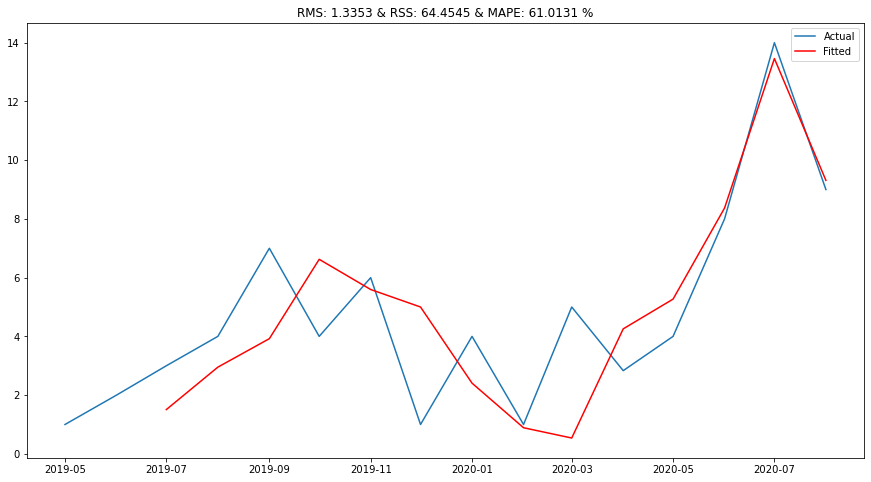

In [70]:
plt.figure(figsize=(15,8)) 
plt.plot(slab_totals_log, label='Actual')
plt.plot(results_ARIMA_retrained.fittedvalues[2:], color='red',label = 'Fitted')
plt.legend(loc='best')

rss = sum((results_ARIMA_retrained.fittedvalues-slab_totals_log['Totals'])**2)

# rms = sqrt(mean_squared_error(slab_totals_log['Totals'],results_ARIMA_retrained.fittedvalues))

mape_train = mape(slab_totals_log['Totals'], results_ARIMA_retrained.fittedvalues)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms,rss, mape_train))

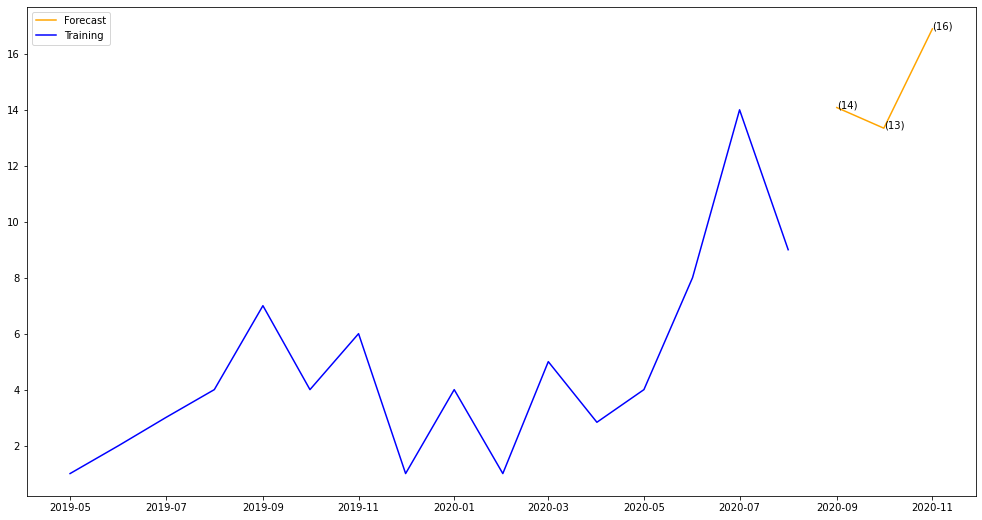

In [211]:
# Perform a forecast for next 3 months:
fc_retrained_log = results_ARIMA_retrained.forecast(3)
if apply_log:
    fc_retrained = np.exp(fc_retrained_log)
else:
    fc_retrained = fc_retrained_log

plt.figure(figsize=(17,9))
plt.plot(fc_retrained, color='orange', label='Forecast')
plt.plot(slab_totals, color='blue', label='Training')
plt.legend(loc='best')

for date, qty in zip(fc_retrained.index, list(fc_retrained.iloc[0:3,])):
    plt.text(date, qty, '({})'.format(math.floor(qty)))

## Auto Arima

In [39]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [40]:
arima_model = arimamodel(slab_totals_train_log)
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=31.745, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=24.167, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=13.718, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=13.109, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=17.135, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=14.739, Time=0.09 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=10.815, Time=0.20 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=18.507, Time=0.24 sec

Best model:  ARIMA(4,2,1)(0,0,0)[0]          
Total fit time: 1.510 seconds
                               SARIMAX Results                  

## Predictions and test verification:

### ARIMA

In [41]:
# start = len(slab_totals_train) 
# end = len(slab_totals_train) + len(slab_totals_test) - 1
# forecast = results_ARIMA.forecast(len(slab_totals_test))